# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Jaidev Mirchandani
- Bora Mutluoglu
- Yuqi Zhang
- Keven Wilbert Saputra
- Weiqi Peng

# Group Members IDs

- A92092333
- A13458532
- A15155513
- A14772056
- A14416515

# Research Question

Which of the following factors from median age of house, total rooms, total bedrooms, households and median income plays the most significant role in affecting the prices of houses in California? 


## Background and Prior Work

Over the years, the median housing prices in the US has risen quite significantly in which, according to census gov website, home values increase approximately $10000 every decade from 1940 to 2000. This trend shows a concerning issue as more graduates are searching for an affordable home. Therefore, as a group of students who is currently studying at the University of California, San diego, we are determined to create a Data Science project on what factor plays the most significant role in the affected housing prices.

We are curious about this topic because there are a lot of factors that are important to the rising price of housing in the state. Several of these factors include the housing median age, total rooms, total bedrooms, population in the district, households in the district and median income of the population. Moreover, this knowledge helps us when we make the transition from college life to the real world. Since many of our team members are engineering majors, we are more inclined to look for housing in areas where there are ample opportunities for our future careers. Areas that are generally popular for careers in engineering seemingly coincide with very high housing prices, this is concerning for us because being college students we want to be able to live somewhere affordable after we graduate. One such place in California is the Bay Area, as people swarm into the area to find work in the tech industry the options for housing diminish which cause the prices of the available options increase. In effect, the San Francisco Bay Area has become a place where the average rent is the highest in the country.


References (include links):
- 1) https://www.census.gov/hhes/www/housing/census/historic/values.html
- 2) https://scotscoop.com/college-graduates-struggle-to-find-affordable-bay-area-housing/


# Hypothesis



We predict that the median income is the factor that has the greatest effect on house prices in California. This is because higher disposable income leads to an increase in the demand for long-term investments such as housing, which eventually drives house prices up.


# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: California Housing Dataset
- Link to the dataset: https://www.kaggle.com/harrywang/housing#housing.csv
- Number of observations: This dataset contains 20,600 rows and 10 columns. 

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

%matplotlib inline
sns.set()


In [2]:
import pandas as pd


In [3]:
# load dataset in
data_path = './input/housing.csv'
df_housing = pd.read_csv(data_path)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Notice the bedroom number shows as 20433, indicating null values
# see the dataset
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# inpect the statistics
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Cleaning

Describe your data cleaning steps here.

In [6]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [7]:
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# drop the null values
df_housing.dropna(inplace=True)

In [9]:
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

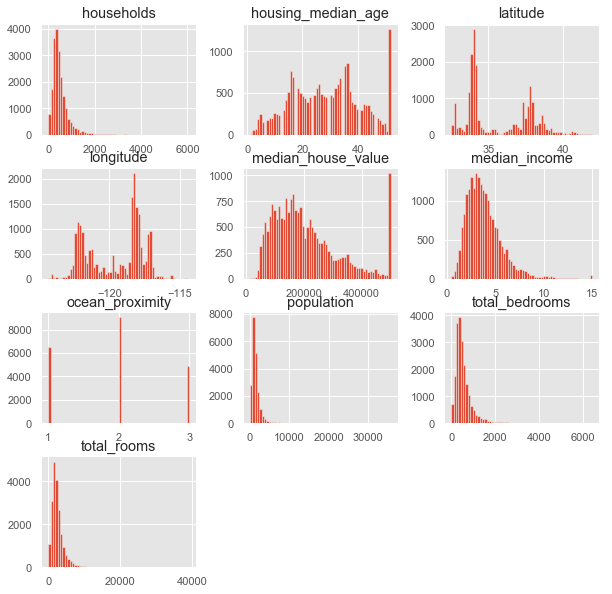

In [77]:
# Let's see the distributions of all elements
with plt.style.context('ggplot'):
    df_housing.hist(bins=60, figsize=(10,10))

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [11]:
# 

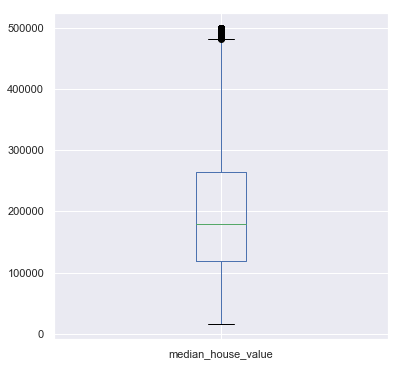

In [81]:

df_housing.boxplot(['median_house_value'],figsize=(6,6))

In [12]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# see if there's strong correlation between entries
corr_mtx = df_housing.corr()
corr_mtx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [13]:
# order the correlation to median_house_value
corr_mtx['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

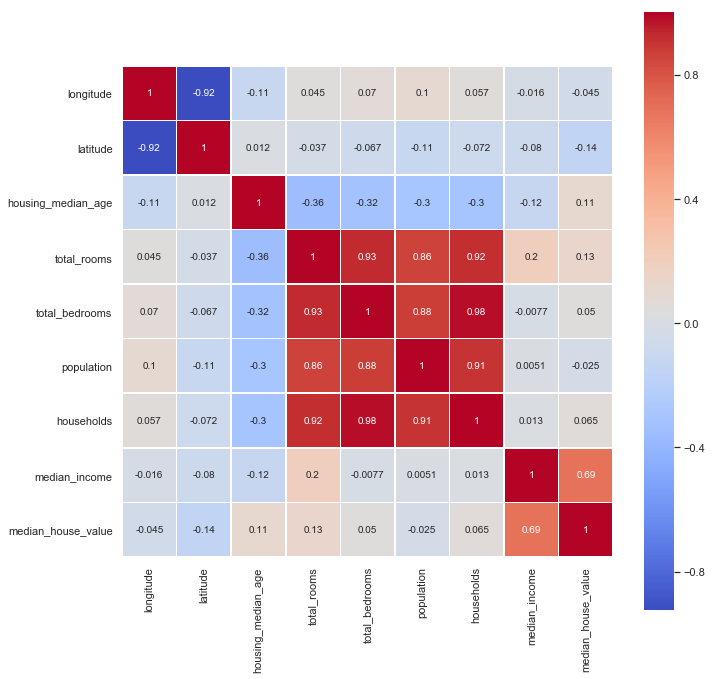

In [14]:
# Visualize the correlation between elements with a heatmap
plt.figure(figsize=(11,11))
hm=sns.heatmap(annot=True, square=True,data=df_housing.corr(),linewidths=0.5,cmap='coolwarm')
plt.show()


We see that median_income has a comparatively highest correlation as 0.69 to median_house_value, while other factors don't seem contribute too much.

In [15]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(-118, 39, 'cluster of high housing prices')

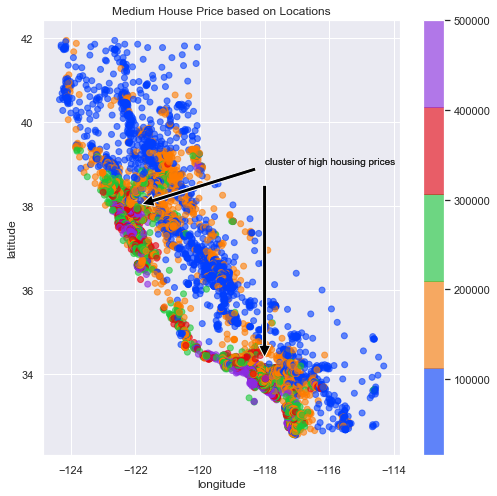

In [16]:
# Location distribution with median housing price
from matplotlib.colors import ListedColormap
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
my_cmap = my_cmap = ListedColormap(sns.color_palette("bright",5))

plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], alpha=0.6, c=df_housing['median_house_value'],
            cmap=my_cmap)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Medium House Price based on Locations")
plt.annotate('cluster of high housing prices', xy=(-122,38), xytext=(-118,39),
              arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('cluster of high housing prices', xy=(-118,34), xytext=(-118,39),
              arrowprops=dict(facecolor='black',shrink=0.08))

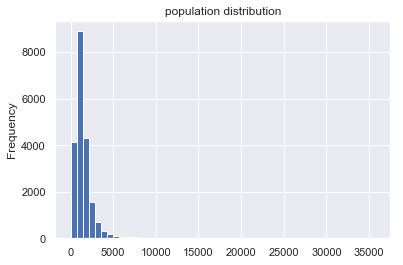

In [17]:
# Population 
df_housing['population'].plot.hist(bins=50,title='population distribution')
# Result: The population distribution strongly skewed to the right
# We might want to exclude the outliers when doing visualizations

Text(0.5, 1.0, 'Population based on Locations')

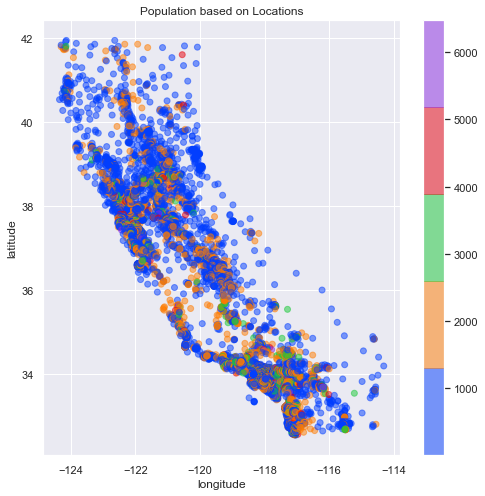

In [18]:
# Population distribution based on location
plt.figure(figsize=(8,8))
my_cmap = my_cmap = ListedColormap(sns.color_palette("bright",5))
#my_cmap = ListedColormap(['#42eef4','#427af4','#c242f4','#f4425f','#dff442'])
#my_cmap = ListedColormap(['#427af4','#f4425f','#dff442'])
df_low_pop = df_housing[df_housing['population']<6500]
plt.scatter(x=df_low_pop['longitude'], y=df_low_pop['latitude'], alpha=0.5, c=df_low_pop['population'],
            cmap=my_cmap)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Population based on Locations")

In [19]:
# Comparison Result: Most of the areas with higher house price tend to have high population rate
# Yet we cannot inspect a high correlation between based on the graphs
# But for now we will keep the population value

In [23]:
# min max of longitude & latitude
min_long, max_long = df_housing['longitude'].min(), df_housing['longitude'].max()
min_lat, max_lat = df_housing['latitude'].min(), df_housing['latitude'].max()

print('Range of longitude: {} ~ {}'.format(min_long, max_long))
print('Range of latitude: {} ~ {}'.format(min_lat, max_lat))

Range of longitude: -124.35 ~ -114.31
Range of latitude: 32.54 ~ 41.95


<Figure size 864x864 with 0 Axes>

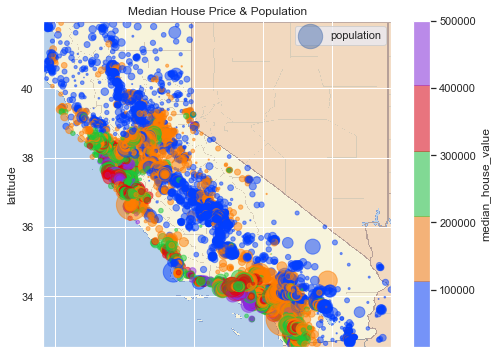

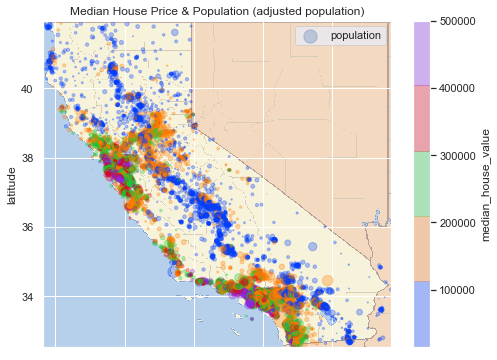

In [82]:
sns.set_style("darkgrid")
ca_map = img.imread('./input/california_map.png')
fig = plt.figure(figsize=(12,12))
# plot the graph that more refects the population
p=df_housing.plot.scatter(x='longitude', y='latitude', alpha=0.5, s=df_housing['population']/30,
                label='population', figsize=(8,6), c='median_house_value', cmap=my_cmap, 
                title='Median House Price & Population')
plt.imshow(ca_map, extent = [-124.35, -114.31, 32.54, 41.95], alpha=0.7)

# plot the graph that more reflects the distribution
df_housing.plot.scatter(x='longitude', y='latitude', alpha=0.3, s=df_housing['population']/100,
                label='population', figsize=(8,6), c='median_house_value', cmap=my_cmap,
                title='Median House Price & Population (adjusted population)')
plt.imshow(ca_map, extent = [-124.35, -114.31, 32.54, 41.95], alpha=0.7)
plt.legend()
plt.show()

# Result:
By inspecting the graph, we see that the housing price is a little bit related to population, and proximity to sea.

Let's further explore the proximity element:


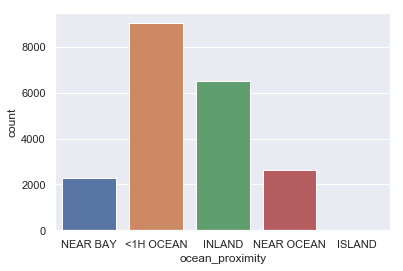

In [26]:
# ocean proximity
sns.countplot(df_housing.ocean_proximity)

Based on the visulization above and our inpection, there's reason for us to beleive that there exists some clusters in terms of the proximity to ocean.



In [36]:
# Encode the categorical value ocean_proximity
# For simplicity, we reckon that all 'island','near bay', 'near ocean' as near ocean
prox_encode = {'NEAR BAY':3, 'NEAR OCEAN':3, 'ISLAND':3, '<1H OCEAN':2, 'INLAND':1}
prox_decode = {3:'NEAR OCEAN' ,2:'<1H OCEAN', 1:'INLAND'}

df_housing['ocean_proximity']=df_housing['ocean_proximity'].apply(lambda x:prox_encode[x])


In [37]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


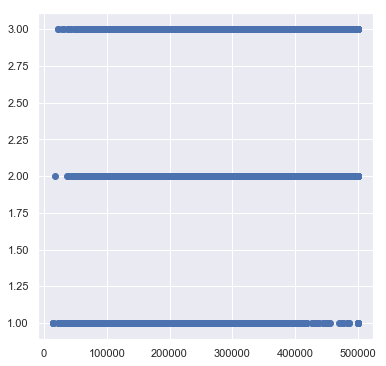

In [42]:
# Let's plot out ocean_proximity vs. housing price
plt.figure(figsize=(6,6))
plt.scatter(df_housing['median_house_value'],df_housing['ocean_proximity'])

It seems hard to visualize through scatter plots. Instead, we computer the average house value  based on ocean proximity.

average house value for close ocean housing:253915.8682439323
average house value for near ocean housing:253915.8682439323
average house value for inland housing:253915.8682439323


([<matplotlib.axis.XTick at 0x1a23805320>,
 <a list of 3 Text xticklabel objects>)

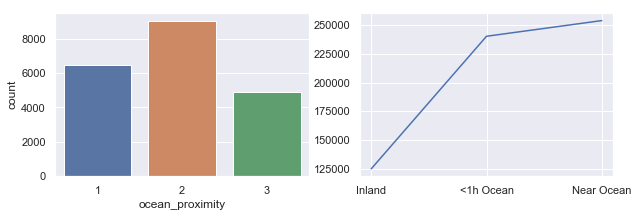

In [69]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(df_housing.ocean_proximity)

avg1,avg2,avg3=df_housing.groupby(['ocean_proximity']).sum().median_house_value/df_housing.ocean_proximity.value_counts()
print('average house value for close ocean housing:{}'.format(avg3))
print('average house value for near ocean housing:{}'.format(avg3))
print('average house value for inland housing:{}'.format(avg3))
plt.subplot(1,2,2)
plt.plot([1,2,3],[avg1,avg2,avg3])
plt.xticks([1,2,3],['Inland','<1h Ocean','Near Ocean'])

Obviously, better ocean_proximity leads to higher house price

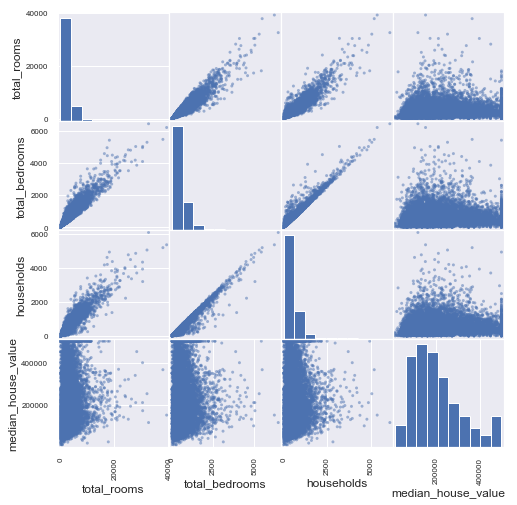

In [90]:

scatter_matrix(df_housing[['total_rooms','total_bedrooms','households','median_house_value']],
               alpha=0.5,figsize=(8,8));

In light of correlation matrix, it seems that households, total bedrooms and total rooms have little to do with the median hosue value. Also, since the median house value is evaluated within different local districts, it doesn't make sense to add things up.

Instead, we want to use average rooms per household at each district.

In [94]:
df_housing['avg_room/household'] = df_housing['total_rooms']/df_housing['households']
df_housing.drop(['total_bedrooms','total_rooms','households'],axis=1,inplace=True);
df_housing.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,avg_room/household
0,-122.23,37.88,41.0,322.0,8.3252,452600.0,3,6.984127
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0,3,6.238137
2,-122.24,37.85,52.0,496.0,7.2574,352100.0,3,8.288136
3,-122.25,37.85,52.0,558.0,5.6431,341300.0,3,5.817352
4,-122.25,37.85,52.0,565.0,3.8462,342200.0,3,6.281853


See the correlation again between average room/household and median house value

In [100]:
corr_mtx=df_housing.corr()
corr=corr_mtx.median_house_value.sort_values(ascending=False)
print(corr)

median_house_value    1.000000
median_income         0.688355
ocean_proximity       0.435575
avg_room/household    0.151344
housing_median_age    0.106432
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


It's easy to see that average room per household is more informative than total rooms and households!

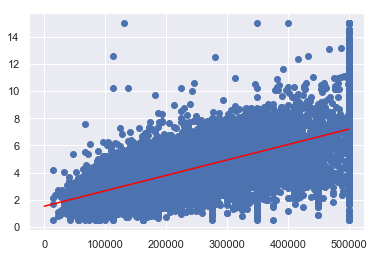

In [38]:
# regression on house prive w.r.t median_income
plt.scatter(df_housing['median_house_value'],df_housing['median_income'])
a,b = np.polyfit(df_housing['median_house_value'],df_housing['median_income'],1)
x = np.arange(1,500000,2)
y = x*a + b
plt.plot(x,y,color='red')

# Ethics & Privacy

The dataset we have chosen is publicly available to us. Hence, there has not been a need to request permission for access to the data. The website we have taken the data from, namely Kaggle, is a website that focuses on data privacy. In order to download datasets, we sign agreements on various aspects of data privacy. It is made clear to us that the data is anonymized and/or based on a random sampling of the population. Also, this dataset has been derived from a paper named “Sparse Spatial Autoregressions” by Pace Kelley and Ronand Barry, and hence the issue of informed consent is taken care of since the authors of the paper have already received the informed consent required to create the original dataset.

Moreover, all the data samples are anonymous and do not involve any sensitive information that might cause trouble to the providers of those data. We analyze the data only for study reasons and for this course project. The data we have downloaded from Kaggle will not used by this group for any financial gains or business purposes. If it is the case that data is not anonymized for any individual, there is a possibility to remove that individual from the dataset through Python Pandas tools. Once the row is deleted, records for that particular individual would be removed as well, which conforms to the “Right to be forgotten”.
A data retention plan would  not be required in this case, as it has already been published in the “Statistics and Probability Letters journal”. Hence, if the data is no longer needed, the journal would still exist, and there would be no need to delete the data. 

There exist potential biases in the observations put forth in the dataset. Potential biases may include families who come from wealthy areas in California such as many places in the Silicon Valley or well off areas in the Los Angeles/San Diego counties. These families that come from these areas may be used to abnormally high house/apartment prices due to potential safety/better quality of life from living in these communities. Schools also play a large part of housing prices since areas with renowned schools generally boast much higher house prices compared to other places that might give out more land for less of a price. However, there might be a risk of missing out on residents since the collection of data is done on a block group basis. The definition of a block group is given in the “Data” section of the proposal. 



# Conclusion & Discussion

*Fill in your discussion information here*

In [ ]:
normaltest?

